In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("./data/water_potability.csv")

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
# sns.pairplot(df.sample(n=20), hue="Potability")

In [6]:
df.shape

(3276, 10)

In [7]:
df_wo = df.dropna()

In [8]:
df["Sulfate"].dropna().shape

(2495,)

In [9]:
df_wo.shape

(2011, 10)

In [10]:
for key in ["Sulfate", "ph", "Trihalomethanes"]:
    df[key] = df[key].fillna(df[key].median())

In [11]:
X, y = df.drop(columns=["Potability"]), df["Potability"]

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(X, y)

StandardScaler()

In [14]:
X = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

In [16]:
import tensorflow as tf

2024-01-19 18:43:35.214276: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 18:43:35.256039: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 18:43:35.256080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 18:43:35.258905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 18:43:35.268252: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 18:43:35.268844: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [18]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation="softmax"),
    ]
)

In [21]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
74/74 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.3902 - val_loss: 0.6267 - val_accuracy: 0.4351
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.3902 - val_loss: 0.6290 - val_accuracy: 0.4351
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.3902 - val_loss: 0.6286 - val_accuracy: 0.4351
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.3902 - val_loss: 0.6273 - val_accuracy: 0.4351
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.3902 - val_loss: 0.6284 - val_accuracy: 0.4351
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.3902 - val_loss: 0.6329 - val_accuracy: 0.4351
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.3902 - val_loss: 0.6324 - val_accuracy: 0.4351
Epoch 8/100
7

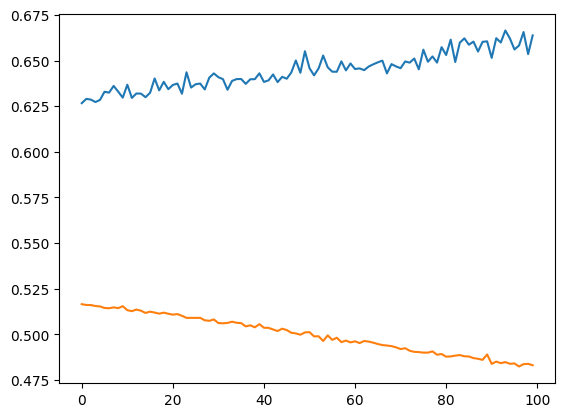

In [44]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

21/21 [==============================] - 0s 1ms/step


In [48]:
accuracy_score(y_test, y_pred_classes)

0.6280487804878049